# Data Cleaning

#### Take a first look at the data

The first thing we'll need to do is load in the libraries and dataset we'll be using.

For demonstration, we'll use a dataset of events that occured in American Football games. In the following exercise, you'll apply your new skills to a dataset of building permits issued in San Francisco.

In [1]:
# modules we'll use
import pandas as pd
import numpy as np

# read in all our data
nfl_data = pd.read_csv("../../dataset/NFL Play by Play 2009-2017 (v4).csv.zip")

# set seed for reproducibility
np.random.seed(0) 
nfl_data.head()

C:\Users\Tymur_Hilfatullin\AppData\Local\Temp\ipykernel_9420\3193805100.py:6: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  nfl_data = pd.read_csv("../../dataset/NFL Play by Play 2009-2017 (v4).csv.zip")


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


#### How many missing data points do we have?

Ok, now we know that we do have some missing values. Let's see how many we have in each column.

In [2]:
# get the number of missing data points per column
missing_values_count = nfl_data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

That seems like a lot! It might be helpful to see what percentage of the values in our dataset were missing to give us a better sense of the scale of this problem:

In [3]:
# how many total missing values do we have?
total_cells = np.product(nfl_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

27.66722370547874


Wow, almost a quarter of the cells in this dataset are empty! 

In the next step, we're going to take a closer look at some of the columns with missing values and try to figure out what might be going on with them.

## Figure out why the data is missing

**Is this value missing because it wasn't recorded or because it doesn't exist?**

In [4]:
# Let's work through an example. Looking at the number of missing values in the nfl_data dataframe, I notice that the column "TimesSec" has a lot of missing values in it:

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

# Drop missing values

If you're in a hurry or don't have a reason to figure out why your values are missing, one option you have is to just remove any rows or columns that contain missing values. 
(Note: I don't generally recommend this approch for important projects!
 It's usually worth it to take the time to go through your data and really look at all the columns with missing values one-by-one to really get to know your dataset.)
 

In [5]:
# remove all the rows that contain a missing value
nfl_data.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


In [6]:
# remove all columns with at least one missing value
columns_with_na_dropped = nfl_data.dropna(axis=1)
columns_with_na_dropped.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,AwayTeam,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009


In [7]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % nfl_data.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 102 

Columns with na's dropped: 37


## Filling in missing values automatically

Another option is to try and fill in the missing values. For this next bit, I'm getting a small sub-section of the NFL data so that it will print well.

In [8]:
# get a small subset of the NFL dataset
subset_nfl_data = nfl_data.loc[:, 'EPA':'Season'].head()
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


We can use the Panda's fillna() function to fill in missing values in a dataframe for us. One option we have is to specify what we want the NaN values to be replaced with. Here, I'm saying that I would like to replace all the NaN values with 0.

In [9]:
# replace all NA's with 0
subset_nfl_data.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


I could also be a bit more savvy and replace missing values with whatever value comes directly after it in the same column. (This makes a lot of sense for datasets where the observations have some sort of logical order to them.)

In [11]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the remaining na's with 0
subset_nfl_data.bfill().fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


# Scaling and Normalization

Transform numeric variables to have helpful properties.

In [12]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

### Scaling vs. Normalization: What's the difference?

One of the reasons that it's easy to get confused between scaling and normalization is because the terms are sometimes used interchangeably and, to make it even more confusing, they are very similar! In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that:

in scaling, you're changing the range of your data, while
in normalization, you're changing the shape of the distribution of your data.
Let's talk a little more in-depth about each of these options.

# Scaling

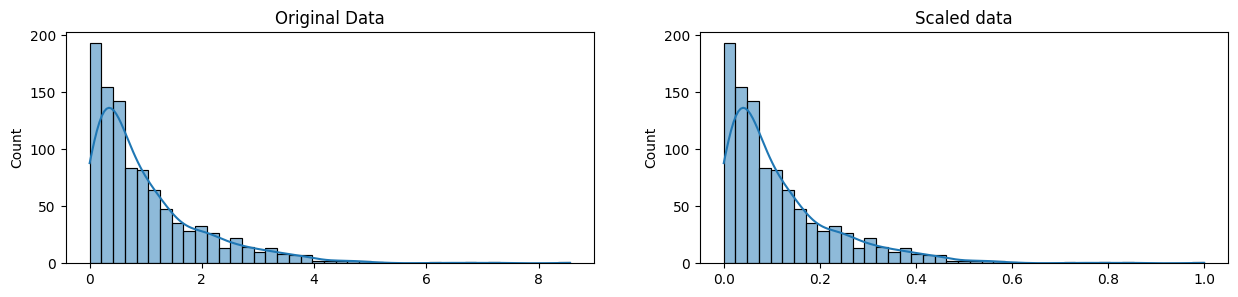

In [13]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

# Normalization


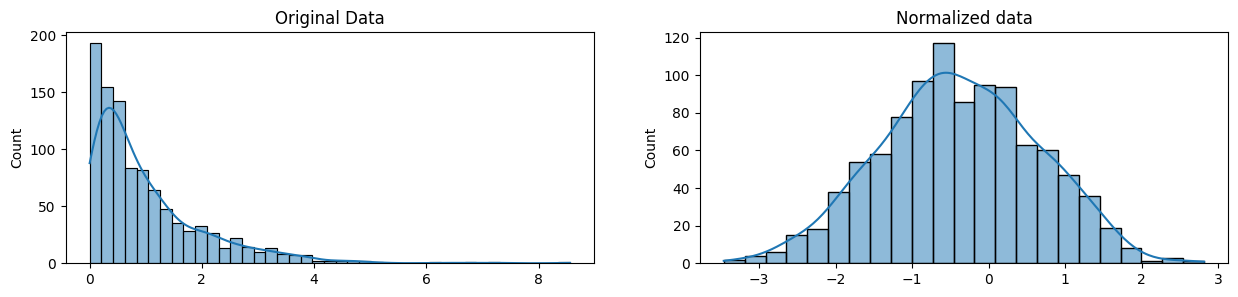

In [14]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

## Parsing Dates

Help Python recognize dates as composed of day, month, and year.

In [1]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
landslides = pd.read_csv("../../dataset/catalog.zip")

# set seed for reproducibility
np.random.seed(0)

In [2]:
# Check the data type of our date column
# We begin by taking a look at the first five rows of the data.
landslides['date'].head()

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

Pandas uses the "object" dtype for storing various types of data types,
 but most often when you see a column with the dtype "object" it will have strings in it.

In [3]:
# check the data type of our date column
landslides['date'].dtype

dtype('O')

#### Convert our date columns to datetime

Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it is recognized as a date. This is called "parsing dates" because we're taking in a string and identifying its component parts.

In [4]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")

In [5]:
# print the first few rows
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

In [ ]:
# What if I run into an error with multiple date formats? While we're specifying the date format here, sometimes you'll run into an error when there are multiple date formats in a single column. If that happens, you can have pandas try to infer what the right date format should be. You can do that like so:

landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)

Why don't you always use infer_datetime_format = True?
 There are two big reasons not to always have pandas guess the time format. 
 The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.

In [6]:
# Select the day of the month
# Now that we have a column of parsed dates, we can extract information like the day of the month that a landslide occurred.

day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

### Plot the day of the month to check the date parsing

One of the biggest dangers in parsing dates is mixing up the months and days. The to_datetime() function does have very helpful error messages, but it doesn't hurt to double-check that the days of the month we've extracted make sense.

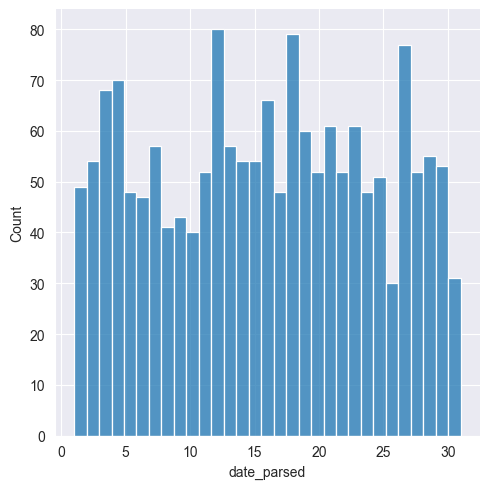

In [8]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.displot(day_of_month_landslides, kde=False, bins=31)

In [10]:
# check date format formats in column
date_lengths = landslides.date.str.len()
date_lengths.value_counts()

# Looks like there are two more rows that has a date in a different format. Run the code cell below to obtain the indices corresponding to those rows and print the data.

date
7.0    1075
6.0     368
8.0     247
Name: count, dtype: int64

In [26]:
# obtain the indices of the rows with a date in a different format
landslides['date'][landslides['date'].str.len() == 6]
landslides['date'][landslides['date'].str.len() == 7]
landslides['date'][landslides['date'].str.len() == 8]

44      10/11/07
45      10/11/07
46      10/12/07
47      10/12/07
48      10/13/07
          ...   
1662    11/11/15
1670    10/21/15
1671    10/21/15
1673    10/15/15
1687    11/29/15
Name: date, Length: 247, dtype: object

# Character Encodings

Avoid UnicoodeDecodeErrors when loading CSV files.

In [27]:
# modules we'll use
import pandas as pd
import numpy as np

# helpful character encoding module
import charset_normalizer

# set seed for reproducibility
np.random.seed(0)

In [28]:
# start with a string
before = "This is the euro symbol: €"

# check to see what datatype it is
type(before)

str

In [29]:
# encode it to a different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors="replace")

# check the type
type(after)

bytes

In [30]:
# take a look at what the bytes look like
after

b'This is the euro symbol: \xe2\x82\xac'

In [31]:
# convert it back to utf-8
print(after.decode("utf-8"))

This is the euro symbol: €


In [32]:
# try to decode our bytes with the ascii encoding
print(after.decode("ascii"))

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 25: ordinal not in range(128)

In [33]:
# start with a string
before = "This is the euro symbol: €"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after.decode("ascii"))

# We've lost the original underlying byte string! It's been 
# replaced with the underlying byte string for the unknown character :(

This is the euro symbol: ?


# Reading in files with encoding problems

Most files you'll encounter will probably be encoded with UTF-8. This is what Python expects by default, so most of the time you won't run into problems. However, sometimes you'll get an error like this:

In [35]:
# try to read in a file not in UTF-8
kickstarter_2016 = pd.read_csv("../../dataset/ks-projects-201801-utf8.zip")

C:\Users\Tymur_Hilfatullin\AppData\Local\Temp\ipykernel_27912\1810942798.py:2: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  kickstarter_2016 = pd.read_csv("../../dataset/ks-projects-201801-utf8.zip")


In [ ]:
# look at the first ten thousand bytes to guess the character encoding
with open("../input/kickstarter-projects/ks-projects-201801.csv", 'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)
{'encoding': 'utf-8', 'language': 'English', 'confidence': 1.0}

In [37]:
# read in the file with the encoding detected by charset_normalizer
kickstarter_2016 = pd.read_csv("../../dataset/ks-projects-201801-utf8.zip", encoding='Windows-1252')

# look at the first few lines
kickstarter_2016.head()

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 60806: character maps to <undefined>

# Inconsistent Data Entry

Efficiently fix typos in your data.

In [38]:
# modules we'll use
import pandas as pd
import numpy as np

# helpful modules
import fuzzywuzzy
from fuzzywuzzy import process
import charset_normalizer

# read in all our data
professors = pd.read_csv("../../dataset/pakistan_intellectual_capital.zip")

# set seed for reproducibility
np.random.seed(0)

C:\Users\Tymur_Hilfatullin\Projects\ML\.venv\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [39]:
# We'll begin by taking a quick look at the first few rows of the data.

professors.head()

,Unnamed: 0,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
1,4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN
2,5,6,Dr. Junaid Baber,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"Information processing, Multimedia mining",NaN
3,6,7,Dr. Maheen Bakhtyar,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"NLP, Information Retrieval, Question Answering...",NaN
4,24,25,Samina Azim,Sardar Bahadur Khan Women's University,Computer Science,Balochistan,Lecturer,BS,Balochistan University of Information Technolo...,Pakistan,2005.0,VLSI Electronics DLD Database,NaN


Say we're interested in cleaning up the "Country" column to make sure there's no data entry inconsistencies in it. 
We could go through and check each row by hand, of course, and hand-correct inconsistencies when we find them.
 There's a more efficient way to do this, though!

In [40]:
# get all the unique values in the 'Country' column
countries = professors['Country'].unique()

# sort them alphabetically and then take a closer look
countries.sort()
countries

array([' Germany', ' New Zealand', ' Sweden', ' USA', 'Australia',
       'Austria', 'Canada', 'China', 'Finland', 'France', 'Greece',
       'HongKong', 'Ireland', 'Italy', 'Japan', 'Macau', 'Malaysia',
       'Mauritius', 'Netherland', 'New Zealand', 'Norway', 'Pakistan',
       'Portugal', 'Russian Federation', 'Saudi Arabia', 'Scotland',
       'Singapore', 'South Korea', 'SouthKorea', 'Spain', 'Sweden',
       'Thailand', 'Turkey', 'UK', 'USA', 'USofA', 'Urbana', 'germany'],
      dtype=object)

In [41]:
# convert to lower case
professors['Country'] = professors['Country'].str.lower()
# remove trailing white spaces
professors['Country'] = professors['Country'].str.strip()

In [42]:
# get all the unique values in the 'Country' column
countries = professors['Country'].unique()

# sort them alphabetically and then take a closer look
countries.sort()
countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea',
       'southkorea', 'spain', 'sweden', 'thailand', 'turkey', 'uk',
       'urbana', 'usa', 'usofa'], dtype=object)

### Use fuzzy matching to correct inconsistent data entry

Alright, let's take another look at the 'Country' column and see if there's any more data cleaning we need to do.

Fuzzy matching: The process of automatically finding text strings that are very similar to the target string.
 In general, a string is considered "closer" to another one the fewer characters you'd need to change if you were transforming one string into another.
  So "apple" and "snapple" are two changes away from each other (add "s" and "n") while "in" and "on" and one change away (rplace "i" with "o").
   You won't always be able to rely on fuzzy matching 100%, but it will usually end up saving you at least a little time.

In [43]:
# get the top 10 closest matches to "south korea"
matches = fuzzywuzzy.process.extract("south korea", countries, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
matches

[('south korea', 100),
 ('southkorea', 48),
 ('saudi arabia', 43),
 ('norway', 35),
 ('ireland', 33),
 ('portugal', 32),
 ('singapore', 30),
 ('netherland', 29),
 ('macau', 25),
 ('usofa', 25)]

We can see that two of the items in the cities are very close to "south korea": "south korea" and "southkorea".
 Let's replace all rows in our "Country" column that have a ratio of > 47 with "south korea".

To do this, I'm going to write a function. 
(It's a good idea to write a general purpose function you can reuse if you think you might have to do a specific task more than once or twice. 
This keeps you from having to copy and paste code too often, which saves time and can help prevent mistakes.)

In [44]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 47):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")

In [45]:
# Now that we have a function, we can put it to the test!

# use the function we just wrote to replace close matches to "south korea" with "south korea"
replace_matches_in_column(df=professors, column='Country', string_to_match="south korea")


All done!


,Unnamed: 0,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,thailand,NaN,Software Engineering & DBMS,NaN
1,4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,thailand,NaN,DBMS,NaN
2,5,6,Dr. Junaid Baber,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,thailand,NaN,"Information processing, Multimedia mining",NaN
3,6,7,Dr. Maheen Bakhtyar,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,thailand,NaN,"NLP, Information Retrieval, Question Answering...",NaN
4,24,25,Samina Azim,Sardar Bahadur Khan Women's University,Computer Science,Balochistan,Lecturer,BS,Balochistan University of Information Technolo...,pakistan,2005.0,VLSI Electronics DLD Database,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,1974,1975,Dr. Ahmar Rashid,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Associate Professor,PhD,JNU,south korea,NaN,"Electrical Impedance Tomography, Inverse algor...",NaN
1138,1975,1976,Dr. Fawad Hussain,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Associate Professor,PhD,Grenoble,france,NaN,"Machine Learning, Big Data Anaysis, Data Minin...",NaN
1139,1977,1978,Dr. Rashad M Jillani,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Assistant Professor,PhD,Florida Atlantic University,usa,2012.0,"Digital Multimedia Systems, Video Compression ...",NaN
1140,1979,1980,Dr. Shahabuddin Ansari,Ghulam Ishaq Khan Institute,Computer Science and Engineering,KPK,Assistant Professor,PhD,Ghulam Ishaq Khan Institute of Science and Tec...,pakistan,NaN,"Medical Image Processing and Analysis, Digital...",NaN


In [47]:
# get all the unique values in the 'Country' column
countries = professors['Country'].unique()

# sort them alphabetically and then take a closer look
countries.sort()
countries

professors['Country'].str.strip

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea', 'spain',
       'sweden', 'thailand', 'turkey', 'uk', 'urbana', 'usa', 'usofa'],
      dtype=object)

In [48]:
replace_matches_in_column(df=professors, column='Country', string_to_match="usa")

All done!


In [52]:
countries = professors['Country'].unique()
countries

array(['thailand', 'pakistan', 'germany', 'usa', 'uk', 'china', 'france',
       'south korea', 'malaysia', 'sweden', 'italy', 'canada', 'norway',
       'ireland', 'new zealand', 'urbana', 'portugal',
       'russian federation', 'finland', 'netherland', 'greece', 'turkey',
       'macau', 'singapore', 'japan', 'hongkong', 'saudi arabia',
       'mauritius', 'scotland'], dtype=object)